<a href="https://colab.research.google.com/github/iammiori/AI_19_SS_CLASS/blob/master/0411_3_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mnist 데이터 셋으로 손글씨 데이터 분류**
- 입력 데이터는 28x28 영상데이터를 784차원의 1차원 벡터로 사용
- 출력데이터는 숫자 정답

### 1) 손글씨 데이터 정확도 올릴려면,
- parameters 인 num_epochs 와 batch_size 변경
      - num_epochs = 50, batch_size = 100

In [2]:
from google.colab import drive
import os

if os.path.exists('/content/gdrive')==False:
    drive.mount('/content/gdrive')
    print('Google Drive is mounted\n')
else:
    print('Google Drive is already mounted\n')

Google Drive is already mounted



In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.818828986
Epoch: 0002, Cost: 1.085257435
Epoch: 0003, Cost: 0.864798745
Epoch: 0004, Cost: 0.755770931
Epoch: 0005, Cost: 0.686584523
Epoch: 0006, Cost: 0.637953204
Epoch: 0007, Cost: 0.600986018
Epoch: 0008, Cost: 0.571490138
Epoch: 0009, Cost: 0.547181054
Epoch: 0010, Cost: 0.527145614
Epoch: 0011, Cost: 0.510084291
Epoch: 0012, Cost: 0.494643601
Epoch: 0013, Cost: 0.481214442
Epoch: 0014, Cost: 0.469831739
Epoch: 0015, Cost: 0.458875789
Epoch: 0016, Cost: 0.449458207
Epoch: 0017, Cost: 0.441382795
Epoch: 0018, Cost: 0.433171758
Epoch: 0019, Cost: 0.426198458
Epoch: 0020, Cost: 0.419485727
Epoch: 0021, Cost: 0.413063932
Epoch: 0022, Cost: 0.407621409
Epoch: 0023, Cost: 0.402141436
Epoch: 0024, Cost: 0.396709330
Epoch: 0025, Cost: 0.392051933
Epoch: 0026, Cost: 0.387775649


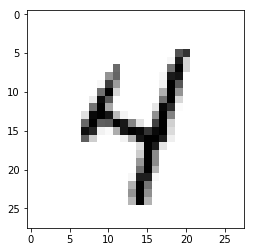

In [6]:
# random seed 설정
tf.set_random_seed(777)


# 데이터 가져오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# one_hot : label 데이터셋을 만들 때, label 을 one-hot 방식으로 처리한 것인지
# default : False 라서 사용할거면 True 로 꼭 설정
# one_hot encoding : 어 집합의 크기를 벡터의 크기로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여
#다른 인덱스에는 0을 부여하는 단어의 벡터 표현

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
# 784 차원
# placeholder
X = tf.placeholder(tf.float32, [None, 784])

# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

# Weight, bias
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))



# softmax 사용해서 hypothesis
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)



# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 50  #15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)
# num_iterations = 1 Epoch 달성위해 배치 몇번 돌았는지 

# 배치란?
# Batch : 방대한 양의 데이터를 나눠서 갖고오고 싶을 때, batch 사용
# tf.train.batch()
# Epoch : 전체 데이터를 학습하는 횟수.
# 말인즉슨, 1 Epoch = 전체 데이터 학습
# ex ) 훈련 데이터가 1000개 batch_size = 200 일때,
# 1 Epoch 달성하려면 batch를 5번 반복 (Iteration) 해야함.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")
    
    # 학습끝
    
    # Test

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()
